### Угадываем признак

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


Посмотрим много ли в наших признаках пустых значений

In [4]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [7]:
print ('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print ('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print ('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print ('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [8]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [9]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
id             10858 non-null int64
name           10858 non-null object
nationality    10858 non-null object
sex            10858 non-null object
dob            10858 non-null object
height         10858 non-null float64
weight         10858 non-null float64
sport          10858 non-null object
gold           10858 non-null int64
silver         10858 non-null int64
bronze         10858 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [12]:
logres = LogisticRegression()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
le.fit( data['sex'] )

LabelEncoder()

In [15]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [19]:
data.drop('sex',axis=1, inplace=True)

In [27]:
selectedColumns = data[ [ 'weight', 'height', 'sport', 'nationality' ] ]
# c этим набором признаков точность становится 84,4

# столбец sport является категориальной переменной
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns , columns = ['sport', 'nationality' ] )

# столбец sex является целевой переменной, удаляем его из X
X.head()

,weight,height,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,...,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,64.0,1.72,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56.0,1.68,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,1.98,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80.0,1.83,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,71.0,1.81,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [29]:
logres.fit(X_train,Y_train)

C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8964712634578696

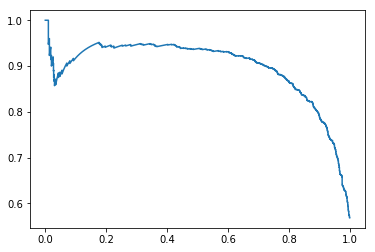

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

model = LogisticRegression()
model.fit(X_train,y_train)

from sklearn.metrics import precision_recall_curve
pr,rec,thresh = precision_recall_curve(y_test,model.predict_proba(X_test)[:,1])

plt.plot(rec,pr)

from sklearn.metrics import average_precision_score
average_precision_score(y_test,model.predict_proba(X_test)[:,1])

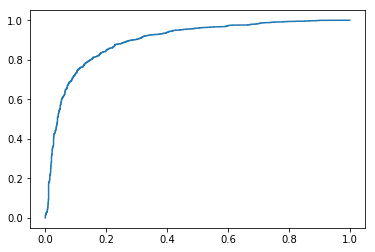

In [65]:
from sklearn.metrics import roc_curve
tpr,fpr,thresh = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.plot(tpr, fpr)

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.8973214065039877